In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
%cd /content/drive/MyDrive/SemEval_Baselines/errorAnalysis

/content/drive/MyDrive/SemEval_Baselines/errorAnalysis


In [4]:
import pandas as pd

misclassified_path = "/content/drive/MyDrive/SemEval_Baselines/errorAnalysis/hateClipper.txt"
ground_truth_path = "/content/drive/MyDrive/SemEval_Baselines/errorAnalysis/groundTruth.txt"
predictionsBaseline = "/content/drive/MyDrive/SemEval_Baselines/errorAnalysis/baselineText.txt"

missClassified = pd.read_csv(misclassified_path, header=None)
missClassified.columns = ['index']
groundTruth = pd.read_csv(ground_truth_path, sep="\t", header=None)

groundTruth.columns = ['filename', 'misogynous', 'label1', 'label2', 'label3', 'label4']

predictionBaselineText = pd.read_csv(predictionsBaseline, header=None, sep="\t")
predictionBaselineText.columns = ['filename', 'label']

predictionBaselineText

,filename,label
0,15236.jpg,1
1,15805.jpg,1
2,16254.jpg,1
3,16191.jpg,1
4,15952.jpg,1
...,...,...
995,15591.jpg,1
996,15049.jpg,1
997,15363.jpg,1
998,15199.jpg,1


In [5]:
df = groundTruth.loc[missClassified['index']]
df['filename'].to_excel('misclassified.xlsx')

In [10]:
test_csv_path = "/content/drive/MyDrive/SemEval_Baselines/errorAnalysis/test - test.csv"

testDf = pd.read_csv(test_csv_path)
testDf


,file_name,label,shaming,stereotype,objectification,violence,text
0,15236.jpg,0,0,0,0,0,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...
1,15805.jpg,1,0,1,1,0,"SO, IF YOU'RE A FEMINIST HOW CAN YOU EAT DAIRY?"
2,16254.jpg,0,0,0,0,0,WHEN A CUTE GIRL LEFT YOUR MESSAGE ON SEEN
3,16191.jpg,1,0,1,1,0,Photographing something you want to show every...
4,15952.jpg,0,0,0,0,0,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...
...,...,...,...,...,...,...,...
995,15591.jpg,1,0,1,1,0,IT'S NOT YOUR FAULT You didn't design the dres...
996,15049.jpg,0,0,0,0,0,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...
997,15363.jpg,1,0,1,1,0,THE STEREOTYPES ARE TRUE F SHE DOES HAVE A TIG...
998,15199.jpg,0,0,0,0,0,DRAWS NAKED PICTURES OF BLACK WOMEN 00 0000 GE...


In [11]:
df

,filename,misogynous,label1,label2,label3,label4
0,15236.jpg,0,0,0,0,0
4,15952.jpg,0,0,0,0,0
18,15136.jpg,0,0,0,0,0
20,15846.jpg,1,0,0,1,0
29,17077.jpg,0,0,0,0,0
...,...,...,...,...,...,...
990,16195.jpg,0,0,0,0,0
991,16312.jpg,0,0,0,0,0
993,15603.jpg,0,0,0,0,0
996,15049.jpg,0,0,0,0,0


In [12]:
merged_df = pd.merge(df, testDf, left_on='filename', right_on='file_name', how='left')

finalDf = merged_df[['filename', 'misogynous', 'text']]

In [13]:
finalDf['predictedLabel'] = 1 - finalDf['misogynous']
finalDf

<ipython-input-13-08cb14dd433b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['predictedLabel'] = 1 - finalDf['misogynous']


,filename,misogynous,text,predictedLabel
0,15236.jpg,0,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,1
1,15952.jpg,0,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,1
2,15136.jpg,0,WHERE WILL YOU BE WHEN DIARRHEA HITS In Deep S...,1
3,15846.jpg,1,H.H MOVIE SUBTITLES E ME,0
4,17077.jpg,0,DIPLOMACY Words don't always solve problems. S...,1
...,...,...,...,...
243,16195.jpg,0,"MY GIRLFRIEND SAID MANCHESTER UNITED OR ME,CHO...",1
244,16312.jpg,0,**15% 8 22:33 IF YOU'RE DATING MY DAUGHTER AND...,1
245,15603.jpg,0,In case you're having a bad day here's some ch...,1
246,15049.jpg,0,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,1


In [14]:
examples = []
cw = 0
cfp = 0
for index, row in testDf.iterrows():
    arr = row['text'].split(" ")
    lowercase_array = [element.lower() for element in arr]

    if "girl" in lowercase_array or "girls" in lowercase_array or "woman" in lowercase_array or "women" in lowercase_array or "babe" in lowercase_array or "daughter" in lowercase_array:
        cw += 1            

# total count of women
print(cw)

228


In [15]:
# girl, girls, woman, women, babe, daughter
examples = []
countWomen = 0
countFalsePositive = 0
for index, row in finalDf.iterrows():
    arr = row['text'].split(" ")
    lowercase_array = [element.lower() for element in arr]

    if "girl" in lowercase_array or "girls" in lowercase_array or "woman" in lowercase_array or "women" in lowercase_array or "babe" in lowercase_array or "daughter" in lowercase_array:
        countWomen += 1
        examples.append(index)
        if row['misogynous'] == 0 and row['predictedLabel'] == 1:
            countFalsePositive += 1
            

# total count of women
print(countWomen)
print(countFalsePositive)

75
69


In [16]:
# same experiment for text only baseline model USE-Large
tdf = pd.merge(predictionBaselineText, testDf, left_on='filename', right_on='file_name', how='left')
tdf1 = tdf[['filename', 'label_x', 'label_y', 'text']]
tdf1

cw = 0
cfp = 0
for index, row in tdf1.iterrows():
    arr = row['text'].split(" ")
    lowercase_array = [element.lower() for element in arr]

    if "girl" in lowercase_array or "girls" in lowercase_array or "woman" in lowercase_array or "women" in lowercase_array or "babe" in lowercase_array or "daughter" in lowercase_array:
        cw += 1
        if row['label_x'] == 1 and row['label_y'] == 0:
            cfp += 1   

# total count of women
print(cw)
print(cfp)
print(100* cfp/cw)

228
89
39.03508771929825


In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(finalDf['misogynous'], finalDf['predictedLabel'])

print(cm)

[[  0 221]
 [ 27   0]]


<Axes: >

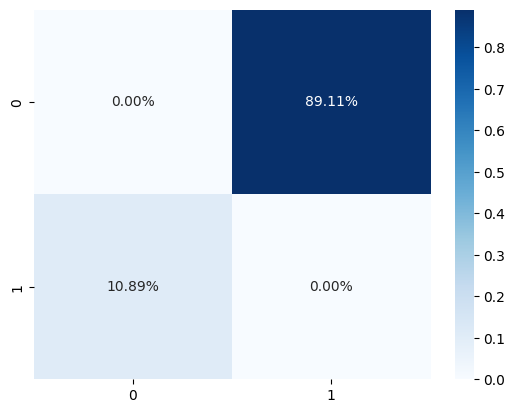

In [18]:
import seaborn as sns
import numpy as np

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [19]:
# data with words being women. 

print(examples)

[0, 1, 7, 10, 13, 16, 20, 25, 28, 29, 30, 35, 37, 40, 46, 48, 49, 50, 53, 55, 56, 57, 58, 60, 64, 67, 73, 77, 79, 83, 87, 88, 92, 95, 96, 98, 100, 102, 106, 107, 118, 120, 121, 123, 127, 128, 132, 140, 143, 145, 146, 147, 148, 150, 152, 158, 162, 170, 172, 178, 180, 185, 187, 196, 203, 210, 215, 216, 219, 231, 232, 237, 241, 244, 247]


<Axes: >

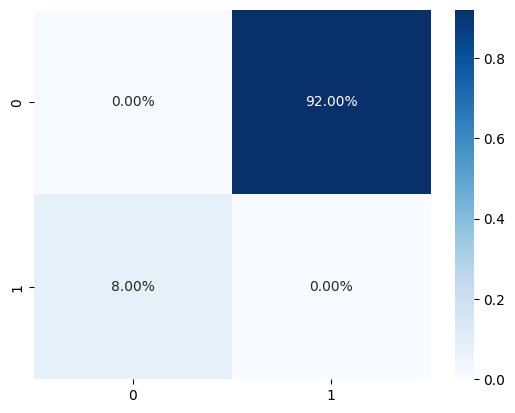

In [20]:
new_df = finalDf.iloc[examples]

cm2 = confusion_matrix(new_df['misogynous'], new_df['predictedLabel'])

sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')

In [30]:
deepHateClipperPath = "/content/drive/MyDrive/SemEval_Baselines/errorAnalysis/deepHateClipper.txt"

deepHateClipperDf = pd.read_csv(deepHateClipperPath, header=None)
deepHateClipperDf.columns = ['index']

df = groundTruth.loc[deepHateClipperDf['index']]

merged_df = pd.merge(df, testDf, left_on='filename', right_on='file_name', how='left')

finalDf = merged_df[['filename', 'misogynous', 'text']]

finalDf['predictedLabel'] = 1 - finalDf['misogynous']

finalDf

<ipython-input-30-6ba47cb04de9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  finalDf['predictedLabel'] = 1 - finalDf['misogynous']


,filename,misogynous,text,predictedLabel
0,15236.jpg,0,FACEBOOK SINGLES GROUPS BELIKE WHEN A NEW WOMA...,1
1,15952.jpg,0,HEY BABE CAN YOU MAKE ME A SANDWICH? Hey babe ...,1
2,15502.jpg,0,JUST BOUGHT A NEW GUITAR THEN SHE SAID: ARE YO...,1
3,15136.jpg,0,WHERE WILL YOU BE WHEN DIARRHEA HITS In Deep S...,1
4,15846.jpg,1,H.H MOVIE SUBTITLES E ME,0
...,...,...,...,...
251,16195.jpg,0,"MY GIRLFRIEND SAID MANCHESTER UNITED OR ME,CHO...",1
252,16312.jpg,0,**15% 8 22:33 IF YOU'RE DATING MY DAUGHTER AND...,1
253,15603.jpg,0,In case you're having a bad day here's some ch...,1
254,15049.jpg,0,THINK ABOUT HOW MUCH BETTER HER SKIN IS BREATH...,1


In [31]:
# girl, girls, woman, women, babe, daughter
examples = []
countWomen = 0
countFalsePositive = 0
for index, row in finalDf.iterrows():
    arr = row['text'].split(" ")
    lowercase_array = [element.lower() for element in arr]

    if "girl" in lowercase_array or "girls" in lowercase_array or "woman" in lowercase_array or "women" in lowercase_array or "babe" in lowercase_array or "daughter" in lowercase_array:
        countWomen += 1
        examples.append(index)
        if row['misogynous'] == 0 and row['predictedLabel'] == 1:
            countFalsePositive += 1
            

# total count of women
print(countWomen)
print(countFalsePositive)

72
66


<Axes: >

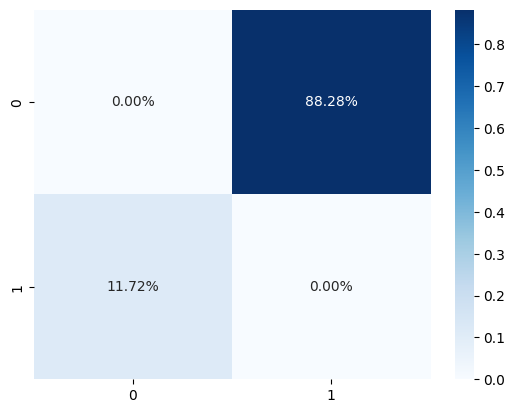

In [32]:
cm = confusion_matrix(finalDf['misogynous'], finalDf['predictedLabel'])

sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')